In [1]:
import pandas as pd

In [2]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [3]:
from scipy.spatial.distance import pdist, squareform

In [4]:
from scipy.sparse import lil_matrix
import scipy.spatial.distance

In [5]:
from sklearn.cluster import KMeans

In [6]:
import matplotlib.pyplot as plt

In [7]:
from scipy.spatial.distance import euclidean, cdist

In [8]:
from sklearn.decomposition import PCA

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
import json

actors = {}
with open("imdb_movies_2000to2022.prolific.json", "r") as f:
    for obj in f:
        movie = json.loads(obj)
        
        for actor_id, actor_name in movie['actors']:
            actors[actor_id] = actor_name

In [11]:
actor_genre_df = pd.read_csv('imdb_movies_2000to2022.actorXgenre.csv', index_col = 'actor_id')

In [12]:
actor_genre_df['actor_name'] = actor_genre_df.index.map(actors)

In [13]:
print(actor_genre_df[:5])

           Comedy  Fantasy  Romance  Drama  Mystery  Thriller  Action  \
actor_id                                                                
nm0000212     7.0      1.0      6.0    6.0      1.0       2.0     1.0   
nm0413168     7.0      3.0      5.0   12.0      5.0       2.0    14.0   
nm0000630     8.0      2.0      6.0   14.0      2.0       3.0     4.0   
nm0005227    10.0      1.0      2.0    2.0      0.0       1.0     1.0   
nm0864851     1.0      0.0      0.0    0.0      0.0       0.0     0.0   

           Biography  Crime  War  ...  Documentary  Sport  News  Family  \
actor_id                          ...                                     
nm0000212        1.0    2.0  1.0  ...          0.0    0.0   0.0     0.0   
nm0413168        4.0    6.0  0.0  ...          0.0    0.0   0.0     0.0   
nm0000630        5.0    1.0  1.0  ...          7.0    3.0   1.0     0.0   
nm0005227        0.0    0.0  0.0  ...          0.0    1.0   0.0     2.0   
nm0864851        0.0    0.0  0.0  ... 

In [14]:
actor_genre_df = actor_genre_df.set_index("actor_name")

In [15]:
target_actor_name = 'Hugh Jackman'
target_actor = actor_genre_df.loc[target_actor_name]
distances = scipy.spatial.distance.cdist(actor_genre_df, [target_actor], metric = 'euclidean').flatten()
query_distances = list(zip(actor_genre_df.index, distances))
for similar_actor_name, similar_genre_score in sorted(query_distances, key = lambda x:x[1], reverse=False)[:10]:
    print(similar_actor_name, similar_genre_score)

Hugh Jackman 0.0
Robert Downey Jr. 7.937253933193772
Chris Evans 8.366600265340756
Chris Pine 10.770329614269007
Channing Tatum 10.954451150103322
Daniel Craig 11.445523142259598
Will Smith 11.916375287812984
Zoe Saldana 12.328828005937952
Jamie Foxx 12.529964086141668
Charlize Theron 12.922847983320086


In [16]:
inertia_values = []

for k in range(2, 31):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(actor_genre_df)
    inertia_values.append(kmeans.inertia_)

In [17]:
print(inertia_values)

[391327.93214333773, 333284.7149508351, 308100.3449328546, 294139.9930543259, 275833.51455800905, 262058.60069134898, 253649.31829151616, 239842.36937828443, 230643.05453769327, 228809.09836691825, 220305.48121390745, 215667.7712486551, 208370.34123548958, 202635.7441699765, 199455.6482395711, 198906.69297679598, 191874.12642451937, 193091.86320672306, 183223.7161418933, 179153.10935144522, 183152.7456143176, 179909.94676473737, 174026.3760700077, 171034.3726159251, 168204.43421770676, 166051.6304761146, 167118.3944318776, 163119.78935286083, 160113.3958094078]


In [18]:
prev = inertia_values[0]
for inertia in inertia_values[1:]:
    print(prev-inertia)
    prev = inertia

58043.217192502634
25184.370017980516
13960.351878528658
18306.47849631688
13774.913866660063
8409.282399832824
13806.948913231725
9199.314840591163
1833.9561707750254
8503.617153010797
4637.709965252347
7297.430013165518
5734.59706551308
3180.0959304053977
548.9552627751254
7032.566552276607
-1217.7367822036904
9868.147064829769
4070.6067904480733
-3999.6362628723728
3242.7988495802274
5883.570694729657
2992.0034540826164
2829.9383982183354
2152.803741592157
-1066.7639557629882
3998.6050790167646
3006.393543453014


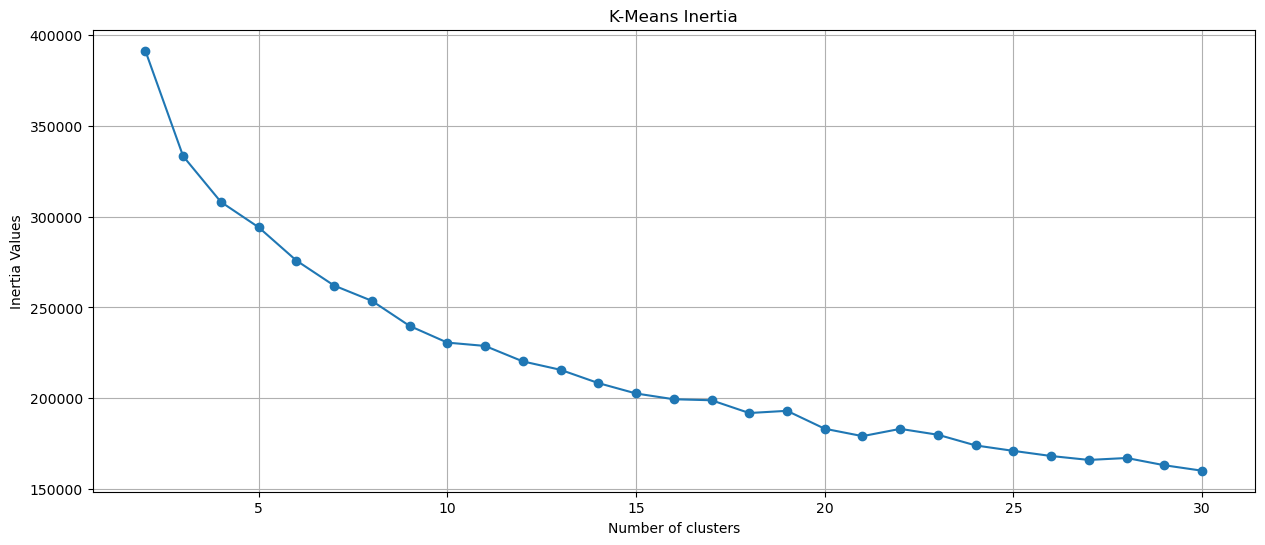

In [19]:
plt.figure(figsize=(15,6))
plt.plot(range(2,31), inertia_values, marker = 'o')
plt.title('K-Means Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.grid(True)
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 8)

In [21]:
cluster_labels = kmeans.fit_predict(actor_genre_df)

In [22]:
print(cluster_labels[:5])

[1 2 3 4 0]


In [23]:
actor_genre_df['cluster'] = cluster_labels

In [24]:
grouped = actor_genre_df.groupby('cluster')

In [25]:
grouped.head()

,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Documentary,Sport,News,Family,Music,Unnamed: 22,Western,Short,Reality-TV,cluster
actor_name,,,,,,,,,,,,,,,,,,,,,
Meg Ryan,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Hugh Jackman,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Liev Schreiber,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
Breckin Meyer,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4
Kenneth Tobey,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Brinke Stevens,8.0,0.0,0.0,4.0,3.0,10.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
R.G. Wilson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
John Goodwin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Crispin Glover,5.0,1.0,0.0,8.0,3.0,4.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


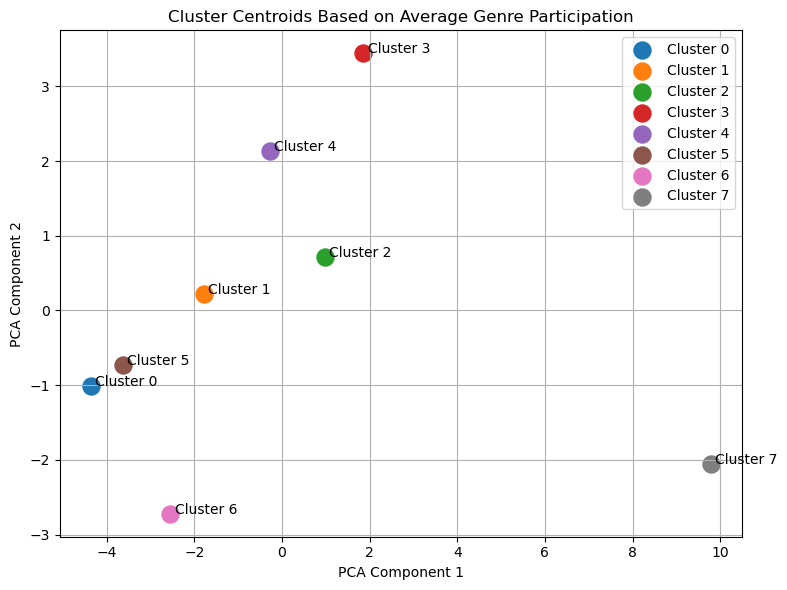

In [26]:
features_only = actor_genre_df.drop(columns=["cluster"])

cluster_centroids = actor_genre_df.groupby("cluster").mean(numeric_only=True)

# Normalize and reduce dimensionality
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_centroids)

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

# Plot
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced):
    label = cluster_centroids.index[i]
    plt.scatter(x, y, label=f'Cluster {label}', s=150)
    plt.text(x + 0.1, y, f'Cluster {label}', fontsize=10)

plt.title("Cluster Centroids Based on Average Genre Participation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_20352\1928854646.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(cluster_ids))


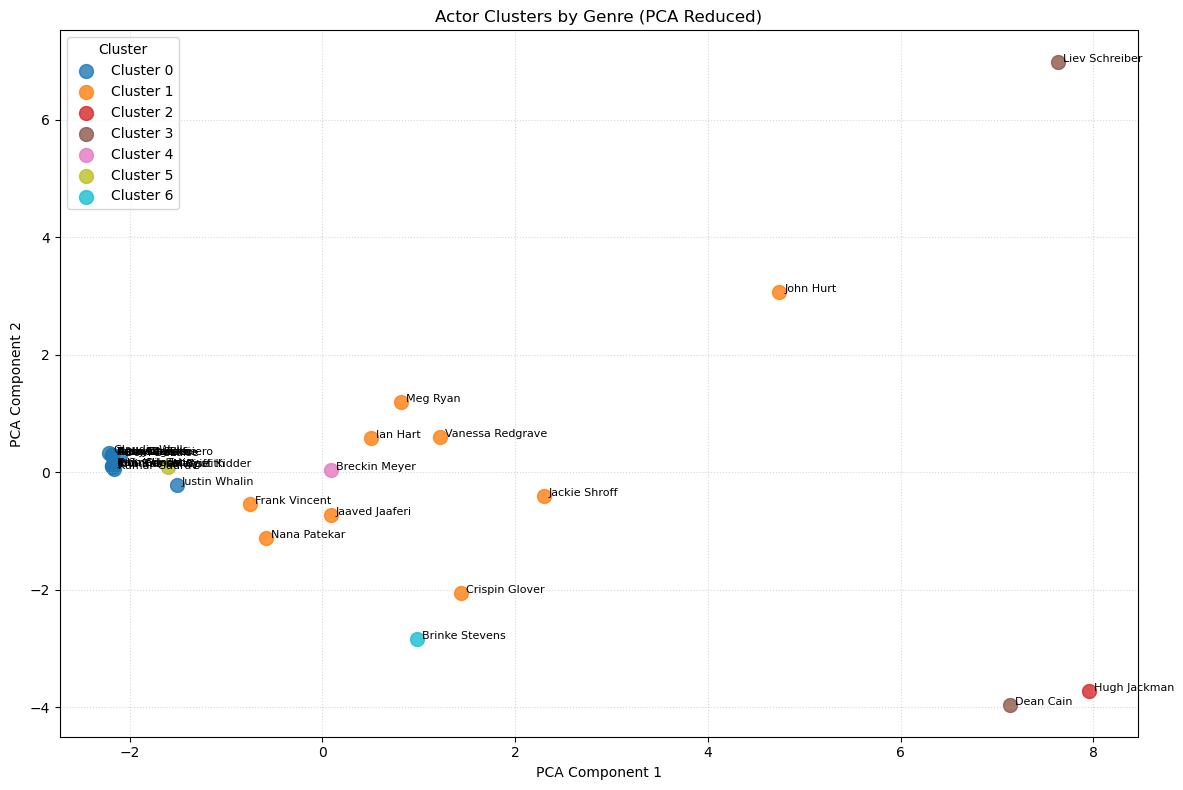

In [27]:
df = actor_genre_df[:30]

# Create graph with only nodes
features = df.drop(columns=["cluster"])
clusters = df["cluster"]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(features_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    "PCA1": reduced[:, 0],
    "PCA2": reduced[:, 1],
    "cluster": clusters.values,
    "actor_name": df.index
})

# Color map setup
cluster_ids = sorted(plot_df["cluster"].unique())
color_map = plt.cm.get_cmap("tab10", len(cluster_ids))
colors = [color_map(cluster_ids.index(c)) for c in plot_df["cluster"]]

# Plot
plt.figure(figsize=(12, 8))
for i, cluster in enumerate(cluster_ids):
    cluster_data = plot_df[plot_df["cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"],
                label=f"Cluster {cluster}",
                s=100,
                alpha=0.8,
                color=color_map(i))

# Optional: label actors
for _, row in plot_df.iterrows():
    plt.text(row["PCA1"] + 0.05, row["PCA2"], row["actor_name"], fontsize=8)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Actor Clusters by Genre (PCA Reduced)")
plt.legend(title="Cluster")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [28]:
cluster_centroids = grouped.mean()

cluster_distances = pd.DataFrame(
    squareform(pdist(cluster_centroids, metric='euclidean')),
    index=cluster_centroids.index,
    columns=cluster_centroids.index
)

In [29]:
print("\nCluster distance matrix:")
print(cluster_distances)


Cluster distance matrix:
cluster          0          1          2          3          4          5  \
cluster                                                                     
0         0.000000  10.398073  24.012637  23.397458  15.718020   3.247461   
1        10.398073   0.000000  15.634951  13.132921   9.151445   7.233998   
2        24.012637  15.634951   0.000000  13.182126  17.364574  21.316100   
3        23.397458  13.132921  13.182126   0.000000  13.141928  20.223540   
4        15.718020   9.151445  17.364574  13.141928   0.000000  12.803039   
5         3.247461   7.233998  21.316100  20.223540  12.803039   0.000000   
6        14.171757  12.201406  20.149633  20.719443  16.033618  12.733146   
7        74.345909  65.429893  51.234251  56.647206  65.297321  71.659023   

cluster          6          7  
cluster                        
0        14.171757  74.345909  
1        12.201406  65.429893  
2        20.149633  51.234251  
3        20.719443  56.647206  
4        16

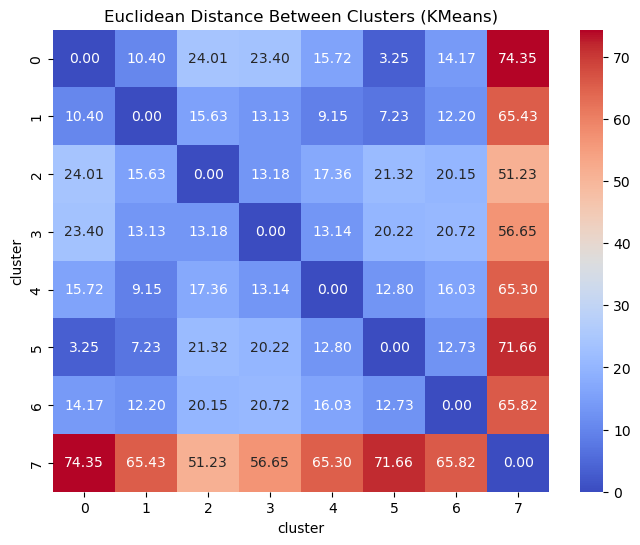

In [30]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_distances, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Euclidean Distance Between Clusters (KMeans)')
plt.show()

In [31]:
for cluster, group in grouped:
    print(f"\nCluster {cluster}: ")
    sample_actors = group.sample(n = 5).index
    for actor in sample_actors:
        print(actor)


Cluster 0: 
John Luder
Anthony Burk
Brian Bosworth
Jodi Draigie
Maclain Nelson

Cluster 1: 
Rajat Kapoor
Benedict Cumberbatch
Carly Pope
Julia Stiles
Chris Mulkey

Cluster 2: 
Chris Evans
Dhanush
Gerard Butler
Louis Mandylor
Costas Mandylor

Cluster 3: 
Jonathan Rhys Meyers
Daniel Brühl
Giovanni Ribisi
Ryan Phillippe
Mark Webber

Cluster 4: 
Jess Weixler
Matt Walsh
Nivin Pauly
Christopher Lloyd
Thomas Haden Church

Cluster 5: 
Peter Stickles
RZA
Isabela Merced
Michael C. Hall
Vinny Vella

Cluster 6: 
Erin Brown
Danielle Harris
Ken May
Julie Anne Prescott
Rachel Nichols

Cluster 7: 
Eric Roberts
Tom Sizemore
Bruce Willis
Michael Madsen
Danny Trejo


In [32]:
for cluster_id in range(8):
    print(f"\nCluster {cluster_id}: ")
    cluster_profile = cluster_centroids.loc[cluster_id]
    top_genres = cluster_profile.sort_values(ascending = False).head(5)
    print(top_genres)


Cluster 0: 
Drama       0.547173
Comedy      0.325263
Horror      0.241430
Thriller    0.240334
Action      0.198452
Name: 0, dtype: float64

Cluster 1: 
Drama       8.670270
Comedy      3.576216
Thriller    3.268108
Action      2.921081
Crime       2.326486
Name: 1, dtype: float64

Cluster 2: 
Action      14.827869
Drama       12.663934
Thriller     8.819672
Crime        8.049180
Comedy       6.229508
Name: 2, dtype: float64

Cluster 3: 
Drama       19.451362
Comedy       7.848249
Thriller     5.396887
Crime        5.315175
Action       5.097276
Name: 3, dtype: float64

Cluster 4: 
Comedy       12.034268
Drama         8.806854
Romance       4.018692
Adventure     2.623053
Action        2.426791
Name: 4, dtype: float64

Cluster 5: 
Drama       2.927738
Comedy      1.859240
Action      0.987204
Thriller    0.978924
Romance     0.786601
Name: 5, dtype: float64

Cluster 6: 
Horror      12.325000
Thriller     4.775000
Comedy       3.808333
Drama        3.458333
Action       2.900000
Name:

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Group by cluster and sample 1 actor per cluster (keep original index: actor_name)
grouped = actor_genre_df.groupby("cluster")
sample_actors = grouped.apply(lambda g: g.sample(1))

# Remove extra multiindex if needed
sample_actors.index = sample_actors.index.droplevel(0)  # drop cluster level
sample_actor_names = sample_actors.index.tolist()       # now these are actor names

# 2. Extract genre features
genre_features = actor_genre_df.drop(columns=["cluster"])
sample_vectors = genre_features.loc[sample_actor_names]

# 3. Compute cosine similarity
similarity_matrix = cosine_similarity(sample_vectors)

# 4. Wrap in a readable DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=sample_actor_names, columns=sample_actor_names)

# Show result
print("Similarity among one actor per cluster:\n")
print(similarity_df.round(2))

Similarity among one actor per cluster:

                      Dan White  David Harbour  William Forsythe  \
Dan White                  1.00           0.07              0.30   
David Harbour              0.07           1.00              0.88   
William Forsythe           0.30           0.88              1.00   
Joseph Gordon-Levitt       0.10           0.93              0.85   
Jeff Daniels               0.04           0.77              0.73   
Diane Salinger             0.47           0.62              0.73   
Donna Hamblin              0.40           0.59              0.81   
Bruce Willis               0.12           0.81              0.86   

                      Joseph Gordon-Levitt  Jeff Daniels  Diane Salinger  \
Dan White                             0.10          0.04            0.47   
David Harbour                         0.93          0.77            0.62   
William Forsythe                      0.85          0.73            0.73   
Joseph Gordon-Levitt                  1.00

C:\Users\Owner\AppData\Local\Temp\ipykernel_20352\2588593851.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_actors = grouped.apply(lambda g: g.sample(1))
